# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

table_rows = soup.find('table', class_ = "table")
table_rows

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# I created a new soup value to extract specifically the data-row values

table_values = table_rows.find_all('tr', class_ = 'data-row')
#table_values

# create an empty list to store all the scraped data
# this will be the final list that will hold the many lists that contain the data in each row

data_rows = []

# scrap the rows with the data in it 
# I created another soup variable that only contains the values to be organized into the lists

for row in table_values:
    row_values = row.find_all('td')
    row_values_list = []
    
    # this second for loop is going to ensure that the values within one row is placed in its specific list
    # it is within the first loop as it goes down through all the values
    # this for loop is basically sending each piece of data into a list within its row, and that list is being send to the initial data_rows
    
    for data in row_values:
        row_values_list.append(data.text)
    data_rows.append(row_values_list)
    
data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_temp_df = pd.DataFrame(data_rows, columns = [
    'id',
    'terrestrial_date',
    'sol',
    'ls',
    'month',
    'min_temp',
    'pressure'
])

In [8]:
# Confirm DataFrame was created successfully

mars_temp_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

mars_temp_df['id'] = pd.to_numeric(mars_temp_df['id'])

mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

mars_temp_df['sol'] = pd.to_numeric(mars_temp_df['sol'])

mars_temp_df['ls'] = pd.to_numeric(mars_temp_df['ls'])

mars_temp_df['month'] = pd.to_numeric(mars_temp_df['month'])

mars_temp_df['min_temp'] = pd.to_numeric(mars_temp_df['min_temp'])

mars_temp_df['pressure'] = pd.to_numeric(mars_temp_df['pressure'])

In [11]:
# Confirm type changes were successful by examining data types again

mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

# take the max value as that will show the final number of months in the data within this timeframe

months_num = mars_temp_df['month'].max()

print(months_num)
print(f'There are {months_num} months on Mars.')

12
There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?

# sol is for martian days, count how many total days

martian_days_count = mars_temp_df['sol'].count()

print(martian_days_count)
print(f'There are {martian_days_count} days worth of data.')

1867
There are 1867 days worth of data.


In [14]:
# 3. What is the average low temperature by month?

# will need to show the average low temp for each month (groupby)

average_low_temp_month = mars_temp_df.groupby('month')['min_temp'].mean()
average_low_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

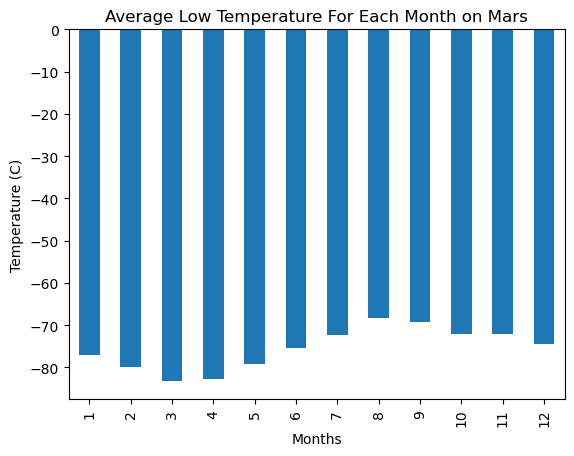

In [15]:
# Plot the average temperature by month

average_low_temp_month.plot.bar()

plt.xlabel('Months')
plt.ylabel('Temperature (C)')
plt.title('Average Low Temperature For Each Month on Mars')

plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location

coldest_month = average_low_temp_month.idxmin()

warmest_month = average_low_temp_month.idxmax()

print(f'Coldest Month: Month', coldest_month)
print(f'Warmest Month: Month', warmest_month)

Coldest Month: Month 3
Warmest Month: Month 8


In [17]:
# 4. Average pressure by Martian month

# similar to before, group the pressures based on the month (groupby month)

average_pres_month = mars_temp_df.groupby('month')['pressure'].mean()
average_pres_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [18]:
most_pressure_month = average_pres_month.idxmin()

lowest_pressure_month = average_pres_month.idxmax()

print(f'Month with the highest Atmospheric Pressure: Month', most_pressure_month)
print(f'Month with the lowest Atmospheric Pressure: Month', lowest_pressure_month)

Month with the highest Atmospheric Pressure: Month 6
Month with the lowest Atmospheric Pressure: Month 9


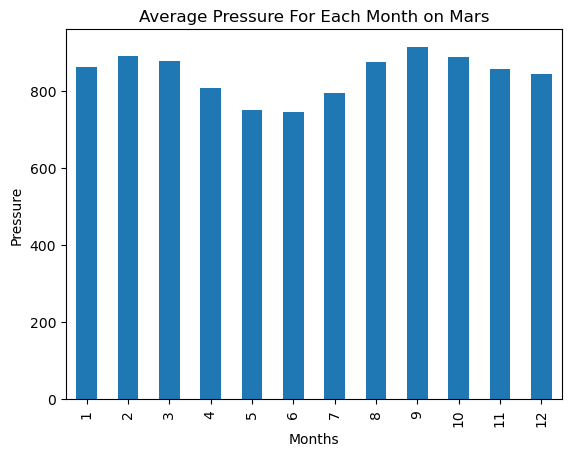

In [19]:
# Plot the average pressure by month

average_pres_month.plot.bar()

plt.xlabel('Months')
plt.ylabel('Pressure')
plt.title('Average Pressure For Each Month on Mars')

plt.show()

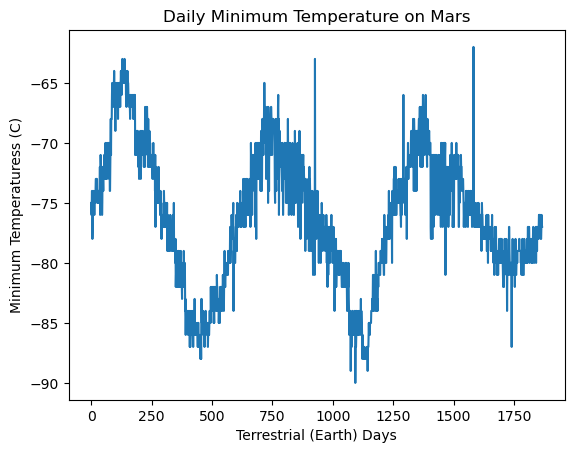

When looking at the max temperatures during two consecutive loops of the graph, the difference between the days would show the best estimate of Earth days that passed.
Following this, the difference estimates at about 670 days, and the actual amout of Earth days that would occur during one year on Mars would be 687 days.


In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year? (graph)

# the best way to show the passage of time on mars is with its temperature
# the plan is to create a graph that shows the temperature as the earth days progress
# and when the temperatures start to repeat at the peaks, that is how many days should have passed on earth

earth_days = mars_temp_df['min_temp']
#earth_days

earth_days.plot(kind = 'line')

plt.xlabel('Terrestrial (Earth) Days')
plt.ylabel('Minimum Temperaturess (C)')
plt.title('Daily Minimum Temperature on Mars')

plt.show()

print(f'When looking at the max temperatures during two consecutive loops of the graph, the difference between the days would show the best estimate of Earth days that passed.')
print(f'Following this, the difference estimates at about 670 days, and the actual amout of Earth days that would occur during one year on Mars would be 687 days.')

These answeres were here before starting the assignment, but my results from above support this data and also answer the questions.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV

mars_temp_df.to_csv('output.csv', index = False)

In [22]:
browser.quit()